In [1]:
import os

from PIL import Image

import torch

from parseq import ParseqApp

In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

device, torch.cuda.get_device_name()

('cuda:0', 'NVIDIA GeForce RTX 3050 Laptop GPU')

In [3]:
parseq = ParseqApp(device=device)

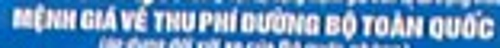

In [4]:
image_path = 'assets/sample.png'
assert os.path.exists(image_path)

image = Image.open(image_path).convert('RGB')
image.resize((500, 500 * image.height // image.width))

In [5]:
model_name = 'parseq'

assert model_name in parseq.models
output, raw_output = parseq(model_name, image, return_confidence=True)

print('Output: {}'.format(output))

for char, conf in zip(*raw_output):
    if float(conf) == 1.0:
        emoji = '🥇'
    elif float(conf) == 0.9:
        emoji = '🥈'
    else:
        emoji = ''
    print('{}: {} {}'.format(char, conf, emoji))

Using cache found in C:\Users\C15TQK/.cache\torch\hub\baudm_parseq_main
d:\work-in-progress\vietocr-streamlit\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\work-in-progress\vietocr-streamlit\.venv\lib\site-packages\timm\models\vision_transformer.py:92: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  x = F.scaled_dot_product_attention(


Output: MONGAVETHIPHINGDOTRANCOUIC
M: 1.0 🥇
O: 0.6 
N: 0.9 🥈
G: 0.8 
A: 0.9 🥈
V: 0.5 
E: 1.0 🥇
T: 1.0 🥇
H: 0.7 
I: 0.7 
P: 1.0 🥇
H: 0.9 🥈
I: 0.9 🥈
N: 1.0 🥇
G: 1.0 🥇
D: 0.9 🥈
O: 0.6 
T: 1.0 🥇
R: 0.9 🥈
A: 1.0 🥇
N: 0.9 🥈
C: 0.4 
O: 0.7 
U: 0.8 
I: 0.4 
C: 0.9 🥈


Using cache found in C:\Users\C15TQK/.cache\torch\hub\baudm_parseq_main
Using cache found in C:\Users\C15TQK/.cache\torch\hub\baudm_parseq_main
D:\Program Files\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
D:\Program Files\Python\Python310\lib\site-packages\torch\nn\functional.py:5193: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Using cache found in C:\Users\C15TQK/.cache\torch\hub\baudm_parseq_main
Using cache found in C:\Users\C15TQK/.cache\torch\hub\baudm_parseq_main
Using cache found in C:\Users\C15TQK/.cache\torch\hub\baudm_parseq_main


     parseq: MONGAVETHIPHINGDOTRANCOUIC
parseq_tiny: MONGGNTETWPHINGBOTRANQHIC
     abinet: www.aAuEmmrrummooorraceoo
       crnn: SATIPHLONATAAC
       trba: MONGHNETWOPHINGSTOURIES
     vitstr: MOWNAVVETHPPNOUNEDOTAAOU


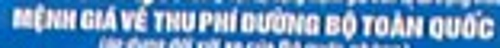

In [6]:
result = {}
for model_name in parseq.models:
    output, _ = parseq(model_name, image)
    result[model_name] = output

max_name_len = max(*list(map(len, result.keys())))
for model_name, output in result.items():
    print('{}{}: {}'.format(' ' * (max_name_len - len(model_name)), 
                            model_name,
                            output))
    
image.resize((500, 500 * image.height // image.width))